# Neural Network Use Case - Personality Classification 
## Name: Alexis Michell Hernandez Robledo

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Leer dataset

In [3]:
df = pd.read_csv('personality_datasert.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


### Preparación de datos y codificación

In [4]:
label_encoders = {}
for col in ['Stage_fear', 'Drained_after_socializing', 'Personality']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

### Define features and target

In [6]:
X = df.drop(columns=['Personality'])
y = df['Personality']
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### Regresión Logística 

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {acc_logreg:.4f}")

Logistic Regression Accuracy: 0.9195


### Red Neuronal con GridSearchCV

In [8]:
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (20,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001]
}

mlp = MLPClassifier(max_iter=1000, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,MLPClassifier...ndom_state=42)
,param_grid,"{'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001], 'hidden_layer_sizes': [(5,), (10,), ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,hidden_layer_sizes,"(10,)"


### Resultados y mejores parámetros

In [9]:
best_model = grid_search.best_estimator_
y_pred_mlp = best_model.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)

print("Best Parameters:", grid_search.best_params_)
print(f"MLPClassifier Accuracy: {acc_mlp:.4f}")
print(f"Improvement over baseline: {acc_mlp - acc_logreg:.4f}")

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,)}
MLPClassifier Accuracy: 0.9264
Improvement over baseline: 0.0069


### Reporte completo de combinaciones probadas

In [10]:
results = pd.DataFrame(grid_search.cv_results_)
display(results[['param_hidden_layer_sizes', 'param_activation', 'param_alpha', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False))

,param_hidden_layer_sizes,param_activation,param_alpha,mean_test_score
7,"(10,)",tanh,0.0001,0.937931
8,"(20,)",tanh,0.0001,0.937931
10,"(10,)",tanh,0.0010,0.937931
11,"(20,)",tanh,0.0010,0.937931
0,"(5,)",relu,0.0001,0.937438
1,"(10,)",relu,0.0001,0.937438
2,"(20,)",relu,0.0001,0.937438
3,"(5,)",relu,0.0010,0.937438
4,"(10,)",relu,0.0010,0.937438
5,"(20,)",relu,0.0010,0.937438


### Gráfica de comparación de modelos

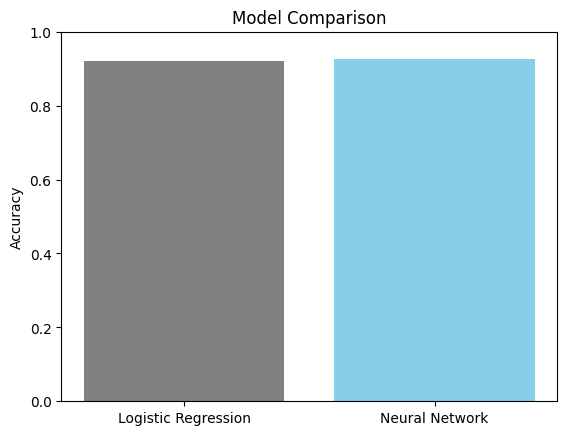

In [11]:
models = ['Logistic Regression', 'Neural Network']
accuracies = [acc_logreg, acc_mlp]

plt.bar(models, accuracies, color=['gray', 'skyblue'])
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

### Curva de pérdida de la red neuronal

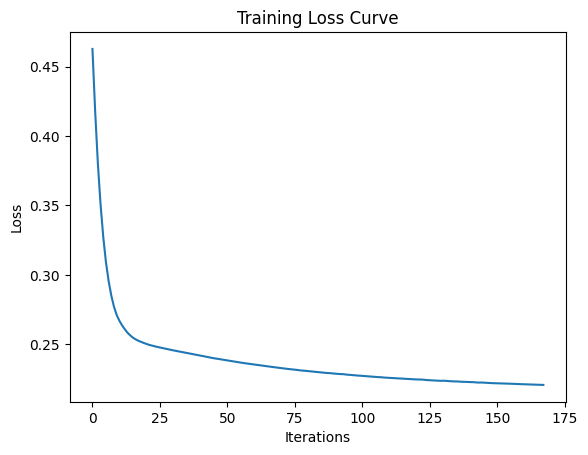

In [12]:
plt.plot(best_model.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

### Matriz de confusión y reporte de clasificación

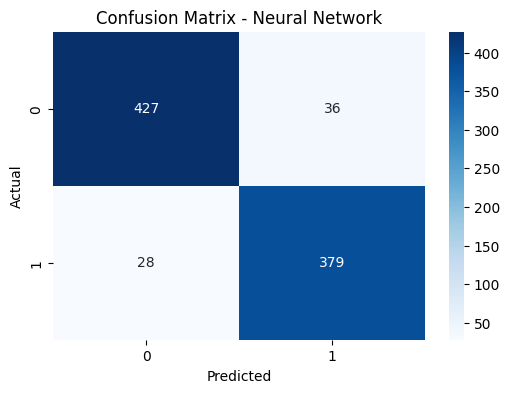

              precision    recall  f1-score   support

   Extrovert       0.94      0.92      0.93       463
   Introvert       0.91      0.93      0.92       407

    accuracy                           0.93       870
   macro avg       0.93      0.93      0.93       870
weighted avg       0.93      0.93      0.93       870



In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred_mlp, target_names=label_encoders['Personality'].classes_))